### **MobileNet**

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Only when you are running on a GPU

physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
def prepare_image(file):
    img_path = "data/MobileNet-samples/"
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

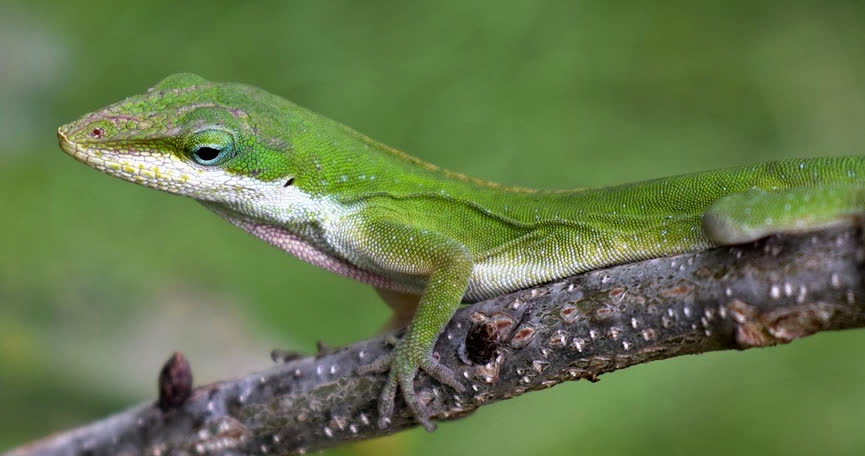

In [6]:
from IPython.display import Image

Image(filename="data/MobileNet-samples/1.png", width=300, height=200)

In [17]:
preprocessed_image = prepare_image("1.png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[[('n01682714', 'American_chameleon', 0.6527449),
  ('n01693334', 'green_lizard', 0.1894346),
  ('n01687978', 'agama', 0.13799639),
  ('n01689811', 'alligator_lizard', 0.013600856),
  ('n01688243', 'frilled_lizard', 0.0043153553)]]

In [18]:
assert results[0][0][1] == "American_chameleon"

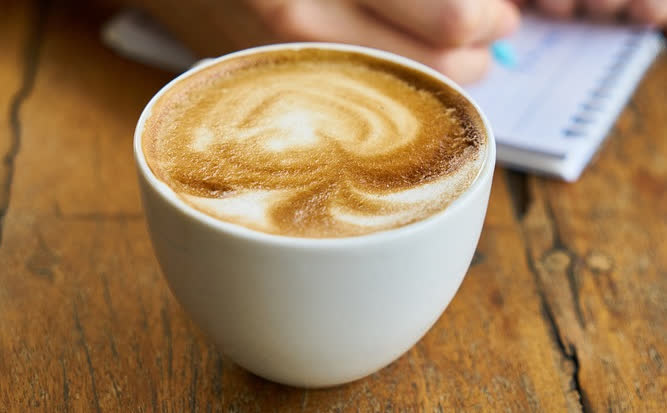

In [19]:
Image(filename="data/MobileNet-samples/2.png", width=300, height=200)

In [20]:
preprocessed_image = prepare_image("2.png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


[[('n07920052', 'espresso', 0.9766625),
  ('n07930864', 'cup', 0.010093511),
  ('n07932039', 'eggnog', 0.008597056),
  ('n03063599', 'coffee_mug', 0.0036651818),
  ('n04597913', 'wooden_spoon', 0.0004963616)]]

In [21]:
assert results[0][0][1] == "espresso"

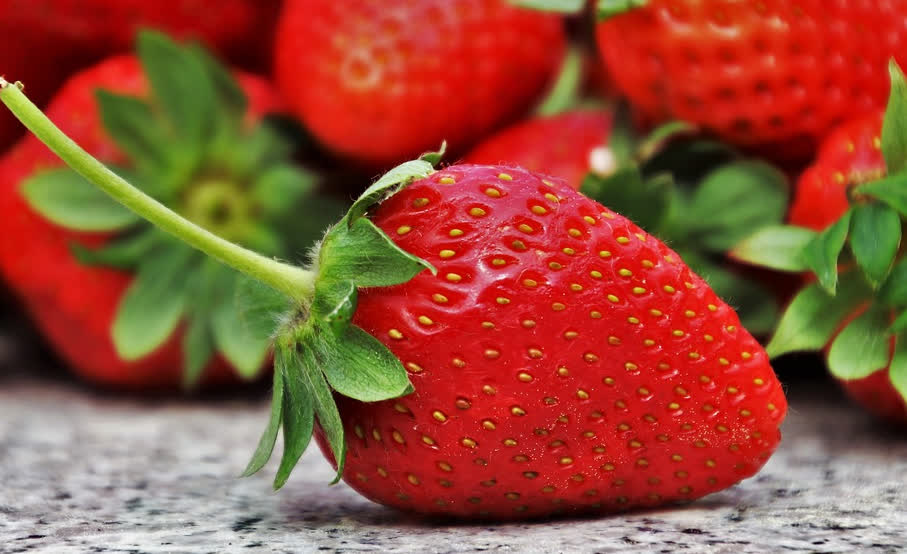

In [22]:
Image(filename="data/MobileNet-samples/3.png", width=300, height=200)

In [23]:
preprocessed_image = prepare_image("3.png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


[[('n07745940', 'strawberry', 0.99999344),
  ('n07749582', 'lemon', 1.2442043e-06),
  ('n07747607', 'orange', 8.6023226e-07),
  ('n07753275', 'pineapple', 8.278187e-07),
  ('n07768694', 'pomegranate', 6.2610155e-07)]]

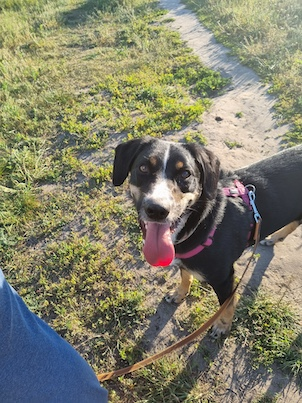

In [9]:
Image(filename="data/MobileNet-samples/torvi2.jpg", width=300, height=200)

In [8]:
preprocessed_image = prepare_image("torvi2.jpg")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


[[('n02108000', 'EntleBucher', 0.4941257),
  ('n02107908', 'Appenzeller', 0.24627091),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.2219244),
  ('n02106166', 'Border_collie', 0.0053894026),
  ('n02088632', 'bluetick', 0.004305905)]]

In [15]:
# for i in range(1, 10):
#     print(f"Torvi {i}")
#     preprocessed_image = prepare_image(f"torvi{i}.jpg")
#     predictions = mobile.predict(preprocessed_image)
#     results = imagenet_utils.decode_predictions(predictions)
#     print(results)
#     print()

## **Fine-tune MobileNet on sign language digits**

### **Image preparation**

Dataset: https://github.com/ardamavi/Sign-Language-Digits-Dataset

- 10 classess (digits 0-9)
- Class data:
    - class 0: 205 images
    - class 1: 206 images
    - class 2: 206 images
    - class 3: 206 images
    - class 4: 207 images
    - class 5: 207 images
    - class 6: 207 images
    - class 7: 206 images
    - class 8: 208 images
    - class 9: 204 images 

Download data and save in current directory/data/Sign-Language-Digits-Dataset. Extract sub-directories labeled 0 through 9 and nest directories directly underneath Sign-Langugage-Digits-Dataset directory. Directory structure should look like this:

- data/
    - Sign-Langugage-Digits-Dataset/
        - 0/
        - 1/
        - 2/
        - 3/
        - 4/
        - 5/
        - 6/
        - 7/
        - 8/
        - 9/

In [37]:
os.getcwd()

'/Users/kubzal/tensorflow_keras'

In [41]:
# Organize data into train, valid, test dirs

os.chdir("data/Sign-Language-Digits-Dataset")
if os.path.isdir("train/0/") is False:
    os.mkdir("train")
    os.mkdir("valid")
    os.mkdir("test")

    for i in range(0, 10):
        shutil.move(f"{i}", "train")
        os.mkdir(f"valid/{i}")
        os.mkdir(f"test/{i}")

        valid_samples = random.sample(os.listdir(f"train/{i}"), 30)
        for j in valid_samples:
            shutil.move(f"train/{i}/{j}", f"valid/{i}")

        test_samples = random.sample(os.listdir(f"train/{i}"), 5)
        for k in test_samples:
            shutil.move(f"train/{i}/{k}", f"test/{i}")
os.chdir("../..")

In [42]:
os.getcwd()

'/Users/kubzal/tensorflow_keras'

In [43]:
for i in range(0, 10):
    assert len(os.listdir(f"data/Sign-Language-Digits-Dataset/valid/{i}")) == 30
    assert len(os.listdir(f"data/Sign-Language-Digits-Dataset/test/{i}")) == 5

In [45]:
train_path = "data/Sign-Language-Digits-Dataset/train"
valid_path = "data/Sign-Language-Digits-Dataset/valid"
test_path = "data/Sign-Language-Digits-Dataset/test"

In [80]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=10)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
).flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False
)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [47]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 300
assert (
    train_batches.num_classes
    == valid_batches.num_classes
    == test_batches.num_classes
    == 10
)

### **Modify Model**

In [48]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [49]:
mobile.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [50]:
def count_params(model):
    non_trainable_params = np.sum(
        [np.prod(v.shape) for v in model.non_trainable_weights]
    )
    trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
    return {
        "non_trainable_params": non_trainable_params,
        "trainable_params": trainable_params,
    }

In [51]:
params = count_params(mobile)

assert params["non_trainable_params"] == 21_888
assert params["trainable_params"] == 4_231_976

In [52]:
# Remove the last 5 layers of the model (why 5? it comes from experimentation)

x = mobile.layers[-6].output

# functional model
output = Dense(units=10, activation="softmax")(x)

In [53]:
# model = Model(inputs=mobile.input, outputs=output)

x = GlobalAveragePooling2D()(x)
output = Dense(units=10, activation="softmax")(x)
model = Model(inputs=mobile.input, outputs=output)

In [66]:
# Freeze the first 23 layers (why 23? it comes from experimentation)

for layer in model.layers[:-23]:
    layer.trainable = False

In [67]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 1,873,930 (7.15 MB)

 Non-trainable params: 1,365,184 (5.21 MB)

In [68]:
# These are params got by Mandy, I got different ones

# params = count_params(model)
# assert params['non_trainable_params'] == 1_365_184
# assert params['trainable_params'] == 1_873_930

### **Train the model**

In [69]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [70]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30


/Users/kubzal/tensorflow_keras/env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


172/172 - 69s - 399ms/step - accuracy: 0.8154 - loss: 0.6152 - val_accuracy: 0.9200 - val_loss: 0.2874
Epoch 2/30
172/172 - 64s - 370ms/step - accuracy: 0.9784 - loss: 0.1151 - val_accuracy: 0.9700 - val_loss: 0.1289
Epoch 3/30
172/172 - 59s - 343ms/step - accuracy: 0.9930 - loss: 0.0627 - val_accuracy: 0.9700 - val_loss: 0.0989
Epoch 4/30
172/172 - 62s - 358ms/step - accuracy: 0.9977 - loss: 0.0367 - val_accuracy: 0.9667 - val_loss: 0.0904
Epoch 5/30
172/172 - 62s - 359ms/step - accuracy: 0.9977 - loss: 0.0231 - val_accuracy: 0.9800 - val_loss: 0.0873
Epoch 6/30
172/172 - 57s - 333ms/step - accuracy: 0.9982 - loss: 0.0167 - val_accuracy: 0.9700 - val_loss: 0.0708
Epoch 7/30
172/172 - 54s - 312ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.9700 - val_loss: 0.0717
Epoch 8/30
172/172 - 54s - 312ms/step - accuracy: 0.9977 - loss: 0.0117 - val_accuracy: 0.9767 - val_loss: 0.0660
Epoch 9/30
172/172 - 55s - 317ms/step - accuracy: 0.9988 - loss: 0.0121 - val_accuracy: 0.9700 - va

### **Save Model**

In [71]:
# Check first to see if file exists already
# If not, the model is saved to disk.

import os.path

if os.path.isfile("models/sign-language-digits-mobilenet.h5") is False:
    model.save("models/sign-language-digits-mobilenet.h5")

In [72]:
# from tensorflow.keras.models import load_model
# model = load_model("models/sign-language-digits-mobilenet.h5")

### **Predict sign language digits**

In [81]:
test_labels = test_batches.classes

In [82]:
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

In [83]:
predictions = model.predict(x=test_batches, verbose=0)

/Users/kubzal/tensorflow_keras/env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [84]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [85]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [86]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting '
    normalize=True.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(ticks=tick_marks, labels=classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",  # Corrected typo here
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 1 0 4 0]
 [0 0 0 0 0 0 0 0 0 5]]


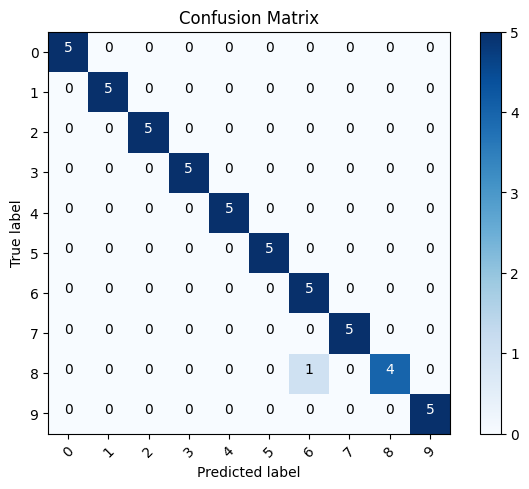

In [87]:
# Train the model with more epochs to see better results
cm_plot_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")